In [ ]:
#This code detects objects using the YOLO algorithm. You may need to install the ultralytics library
#THis code is also used for GITHUB Demo

In [3]:
pip install ultralytics

   ---------------------------------------- 0.0/898.5 kB ? eta -:--:--
   ------------ --------------------------- 276.5/898.5 kB 8.6 MB/s eta 0:00:01
   ----------------------- ---------------- 532.5/898.5 kB 8.3 MB/s eta 0:00:01
   --------------------------- ------------ 614.4/898.5 kB 5.5 MB/s eta 0:00:01
   --------------------------------- ------ 757.8/898.5 kB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 898.5/898.5 kB 4.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.8 MB 4.1 MB/s eta 0:00:10
    --------------------------------------- 0.6/38.8 MB 4.9 MB/s eta 0:00:08
    --------------------------------------- 0.8/38.8 MB 5.1 MB/s eta 0:00:08
   - -------------------------------------- 1.1/38.8 MB 4.9 MB/s eta 0:00:08
   - -------------------------------------- 1.5/38.8 MB 5.5 MB/s eta 0:00:07
   -

In [4]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\13604\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
model = YOLO("yolov8m.pt")
#YOLOv8 is a group of neural network models.
#The bigger the model you choose, the better the prediction quality you can achieve, but the slower it will work.
#It will download the yolov8m.pt file from the Ultralytics server to the current folder. Then it will construct the model object. 
#Now you can train this model, detect objects, and export it to use in production.

#All YOLOv8 models for object detection ship already pre-trained on the COCO dataset, which is a huge collection of images of 80 different types. So, if you do not have specific needs, then you can just run it as is, without additional training.


100%|█████████████████████████████████████████████████████████████████████████████| 49.7M/49.7M [00:08<00:00, 5.97MB/s]


In [9]:
results = model.predict("195.jpg") #it returns an array with a single item. You can pass multiple images. 
#Make sure you use the correct directory. My image is under the same path as my notebook.
result = results[0] #The result contains detected objects


image 1/1 C:\Users\13604\Documents\MSBA_Python_2\image_analytics\195.jpg: 640x640 1 person, 1 chair, 1 couch, 2 potted plants, 1 bed, 1608.0ms
Speed: 15.7ms preprocess, 1608.0ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)


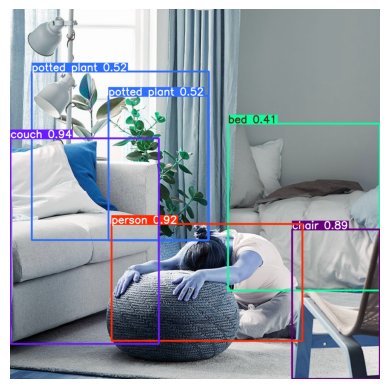

In [10]:
# Display the image with predictions
annotated_image = result.plot()
plt.imshow(annotated_image)
plt.axis('off')  # Turn off the axes for better visualization
plt.show()

#The code below saves the image with annotations:
# Convert the NumPy array to a PIL Image
annotated_image_pil = Image.fromarray(annotated_image)

# Save the PIL Image
annotated_image_pil.save("detected_objects_195.jpg")

In [13]:
#The most important one is the boxes array with information about detected bounding boxes on the image. You can determine how many objects it detected by running the len function
len(result.boxes)

6

In [15]:
print(result.names) #This dictionary has everything that this model can detect. 
#Recall that there are 80 classes. It assigns 0 or close to 0 probabilities for those classes which are not in the image

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [17]:
#you can analyze each box either in a loop or manually.
box = result.boxes[0]
print("Object type:", box.cls)
print("Coordinates:", box.xyxy)
print("Probability:", box.conf)

Object type: tensor([57.])
Coordinates: tensor([[  1.1175, 377.9717, 434.8762, 977.5103]])
Probability: tensor([0.9410])


In [19]:
#Let us get the "actual" data
cords = box.xyxy[0].tolist()
cords = [round(x) for x in cords]
class_id = result.names[box.cls[0].item()]
conf = round(box.conf[0].item(), 2)
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: couch
Coordinates: [1, 378, 435, 978]
Probability: 0.94


In [21]:
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id) #the ID of object type
  print("Coordinates:", cords) #the coordinates of the box as an array [x1,y1,x2,y2]
  print("Probability:", conf) #the confidence level (probability) of the model about this object using classification. If it's very low, you can ignore.
  print("\nNext Object")

Object type: couch
Coordinates: [1, 378, 435, 978]
Probability: 0.94

Next Object
Object type: person
Coordinates: [297, 627, 854, 968]
Probability: 0.92

Next Object
Object type: chair
Coordinates: [823, 643, 1079, 1079]
Probability: 0.89

Next Object
Object type: potted plant
Coordinates: [63, 183, 581, 675]
Probability: 0.52

Next Object
Object type: potted plant
Coordinates: [288, 254, 579, 675]
Probability: 0.52

Next Object
Object type: bed
Coordinates: [636, 334, 1079, 822]
Probability: 0.41

Next Object
